In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

In [2]:
mesh_file = "mesh.txt"
with open(mesh_file, 'r') as f:
    info = f.readlines()
    pass
Nnode = int(info[0])
Ncell = int(info[1])
xy = np.loadtxt(mesh_file, dtype=float, skiprows=2, max_rows=Nnode)[:, 0:2]
icell = np.loadtxt(mesh_file, dtype=int, skiprows=2+Nnode, max_rows=Ncell)[:, 1:4]

In [3]:
K = np.zeros([Nnode, Nnode])
F = np.zeros(Nnode)

In [4]:
for k in range(Ncell):
    ID1, ID2, ID3 = icell[k]
    x1, y1 = xy[ID1]
    x2, y2 = xy[ID2]
    x3, y3 = xy[ID3]
    A2 = 2 * np.linalg.det([
        [1, x1, y1],
        [1, x2, y2],
        [1, x3, y3]
    ])
    k11 = (x2 - x3)**2 + (y2 - y3)**2
    k12 = (x1 - x3) * (-x2 + x3) + (y1 - y3) * (-y2 + y3)
    k13 = (x1 - x2) * (x2 - x3) + (y1 - y2) * (y2 - y3)
    k22 = (x1 - x3)**2 + (y1 - y3)**2
    k23 = -(x1**2 + x2 * x3 - x1 * (x2 + x3) + (y1 - y2) * (y1 - y3))
    k33 = (x1 - x2)**2 + (y1 - y2)**2

    b1 = (x3 * (y1 - y2) + x1 * (y2 - y3) + x2 * (-y1 + y3)) / 6
    b2 = (x3 * (y1 - y2) + x1 * (y2 - y3) + x2 * (-y1+y3)) / 6
    b3 = (x3 * (y1 - y2) + x1 * (y2 - y3) + x2 * (-y1+y3)) / 6

    K[ID1, ID1] += k11 / A2
    K[ID1, ID2] += k12 / A2
    K[ID1, ID3] += k13 / A2

    K[ID2, ID1] += k12 / A2
    K[ID2, ID2] += k22 / A2
    K[ID2, ID3] += k23 / A2

    K[ID3, ID1] += k13 / A2
    K[ID3, ID2] += k23 / A2
    K[ID3, ID3] += k33 / A2

    F[ID1] += b1
    F[ID2] += b2
    F[ID3] += b3
    pass

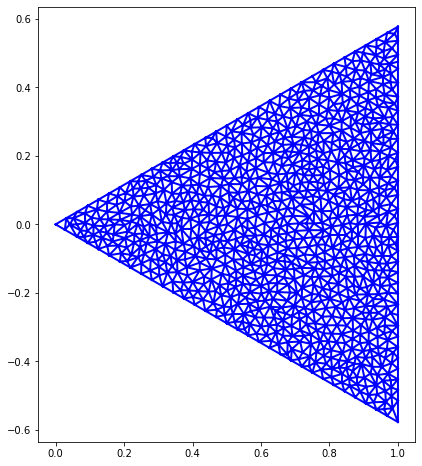

In [5]:
triangle = tri.Triangulation(xy.T[0], xy.T[1], icell)

plt.figure(figsize=(8, 8), facecolor="white")
plt.gca().set_aspect(1)
plt.triplot(triangle, lw=2, color="b")
plt.show()

In [6]:
b = 1.0
tan = np.sqrt(3) / 3
node_inside_ID = []
error = 1e-5
for k in range(Nnode):
    x, y = xy[k]
    err1 = np.abs(x - b)
    err2 = np.abs(y - tan * x)
    err3 = np.abs(y + tan * x)
    if err1 > error and err2 > error and err3 > error:
        node_inside_ID.append(k)
        pass
    pass
node_inside_ID = np.array(node_inside_ID, dtype=int)

In [7]:
Fm = F[node_inside_ID]
Km = (K[node_inside_ID].T[node_inside_ID]).T

In [8]:
u = np.zeros(Nnode)
u[node_inside_ID] = np.linalg.inv(Km) @ Fm

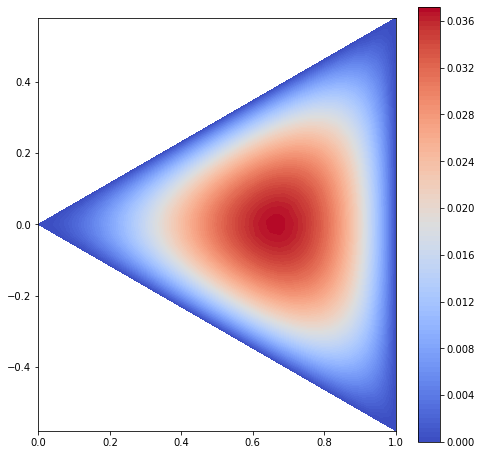

In [9]:
plt.figure(figsize=(8, 8), facecolor="white")
plt.gca().set_aspect(1)

plt.tricontourf(triangle, u, 100, cmap="coolwarm")
plt.colorbar()
plt.show()